In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [38]:
data_path = './data/german.data-numeric'
data = np.genfromtxt(data_path)

X = data[:, :-1]
y = data[:, -1]

cnt = Counter(y)
print(cnt)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

Counter({np.float64(1.0): 700, np.float64(2.0): 300})


In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('Acuracy score:', accuracy_score(y_test, dt_pred))
print('F1 score:', f1_score(y_test, dt_pred))
print('Roc auc score:', roc_auc_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Acuracy score: 0.695
F1 score: 0.7946127946127947
Roc auc score: 0.6050141911069064
[[118  33]
 [ 28  21]]
              precision    recall  f1-score   support

         1.0       0.81      0.78      0.79       151
         2.0       0.39      0.43      0.41        49

    accuracy                           0.69       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.71      0.69      0.70       200



In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Acuracy score:', accuracy_score(y_test, rf_pred))
print('F1 score:', f1_score(y_test, rf_pred))
print('Roc auc score:', roc_auc_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Acuracy score: 0.805
F1 score: 0.88
Roc auc score: 0.6571834031625895
[[143   8]
 [ 31  18]]
              precision    recall  f1-score   support

         1.0       0.82      0.95      0.88       151
         2.0       0.69      0.37      0.48        49

    accuracy                           0.81       200
   macro avg       0.76      0.66      0.68       200
weighted avg       0.79      0.81      0.78       200



In [45]:
def grid_search(algo, n_jobs, dict_param):
    if(algo == 'decision-tree'):
        model = DecisionTreeClassifier()
    else:
        model = RandomForestClassifier()
    classifier = GridSearchCV(estimator = model, cv = 5, param_grid = dict_param, n_jobs = n_jobs, scoring = 'f1')
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    return classifier.best_estimator_

In [46]:
def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

In [84]:
def plot_learning_curve(estimator, title, label_curve, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5), new_plot = False, idx_color = 0):
    if(new_plot):
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    if ylim != None:
        plt.ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes, scoring = "f1")
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r', label = label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = label_curve['train'])

    plt.legend(loc="best")
    return plt

Text(0, 0.5, 'Score')

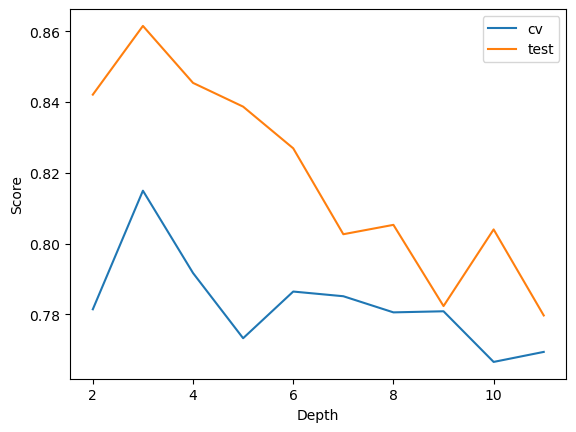

In [114]:
cv_accuracy, test_accuracy = [], []
dep_val = np.arange(2, 12)

for i in dep_val:
    tree = DecisionTreeClassifier(random_state = 12, max_depth = i)
    cv_accuracy.append(cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5, scoring = 'f1').mean())
    tree.fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    test_accuracy.append(f1_score(y_test, tree_pred))

plt.plot(dep_val, cv_accuracy, label = 'cv')
plt.plot(dep_val, test_accuracy, label = 'test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Score')

In [106]:
dict_param = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 17, 25],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'max_leaf_nodes': [None, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight': ["balanced"],
}
tree_best = grid_search('decision-tree', n_jobs = -1, dict_param = dict_param)

DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       max_leaf_nodes=100, min_samples_leaf=10,
                       min_samples_split=3)


In [107]:
tree_best.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,13
,min_samples_split,3
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,100
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [108]:
evaluate(tree_best)

Train Accuracy : 0.795
Train f1 score : 0.8366533864541833
Train roc auc : 0.8127925456643371
Train Confusion Matrix:
[[420 129]
 [ 35 216]]
--------------------------------------------------
Test Accuracy : 0.675
Test f1 score : 0.7719298245614035
Test roc auc : 0.619340451412353
Test Confusion Matrix:
[[110  41]
 [ 24  25]]


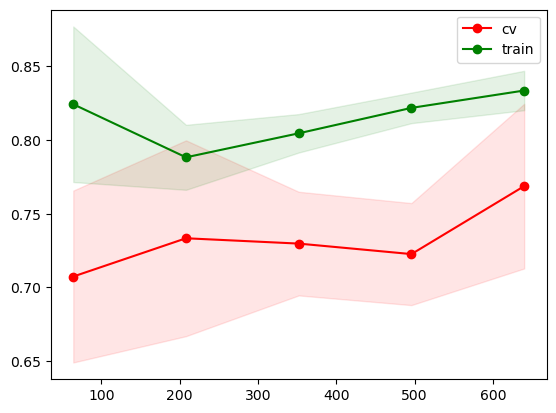

In [109]:
title = ('Learning curve with best tree')
label_curve = {'train': 'train', 'test': 'cv'}
plot_learning_curve(tree_best, title, label_curve, X_train, y_train)
plt.show()

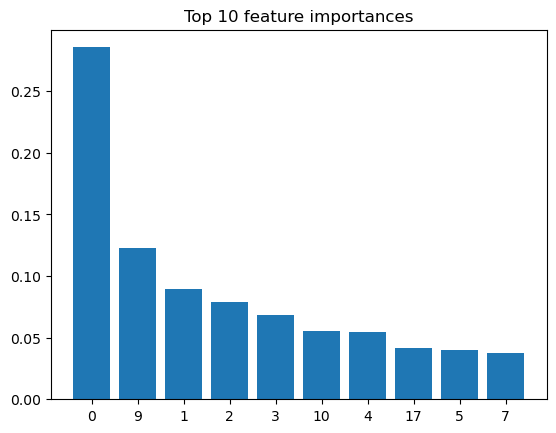

In [110]:
importances = tree_best.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()

Text(0, 0.5, 'Score')

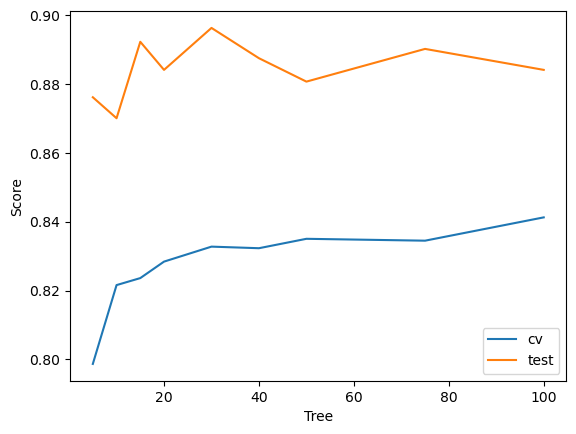

In [113]:
cv_accuracy, test_accuracy = [], []
num_tree = np.array([5, 10, 15, 20, 30, 40, 50, 75, 100])

for i in num_tree:
    not_tree = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 12)
    cv_accuracy.append(cross_val_score(estimator = not_tree, X = X_train, y = y_train, cv = 5, scoring = 'f1').mean())
    not_tree.fit(X_train, y_train)
    tree_pred = not_tree.predict(X_test)
    test_accuracy.append(f1_score(y_test, tree_pred))

plt.plot(num_tree, cv_accuracy, label = 'cv')
plt.plot(num_tree, test_accuracy, label = 'test')
plt.legend()
plt.xlabel('Tree')
plt.ylabel('Score')

In [118]:
dict_param = {
    'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 200, 400],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'criterion': ["gini", "entropy"],
    'class_weight': ["balanced"],
}
not_tree_best = grid_search('lmeo', n_jobs = -1, dict_param = dict_param)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=5, min_samples_split=5)


In [119]:
not_tree_best.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
evaluate(not_tree_best)

Train Accuracy : 0.88375
Train f1 score : 0.9130028063610851
Train roc auc : 0.8806994245241256
Train Confusion Matrix:
[[488  61]
 [ 32 219]]
--------------------------------------------------
Test Accuracy : 0.765
Test f1 score : 0.8417508417508418
Test roc auc : 0.6996215704824976
Test Confusion Matrix:
[[125  26]
 [ 21  28]]


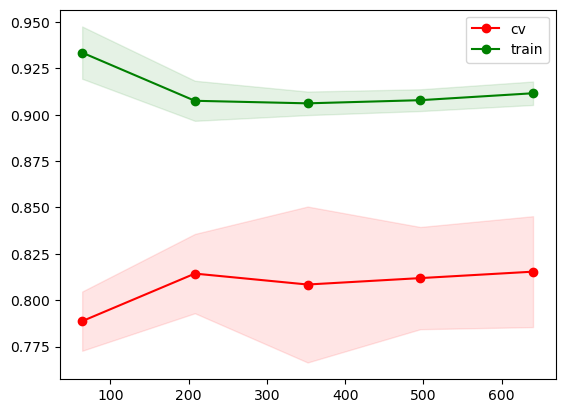

In [121]:
title = ('Learning curve with best tree')
label_curve = {'train': 'train', 'test': 'cv'}
plot_learning_curve(not_tree_best, title, label_curve, X_train, y_train)
plt.show()

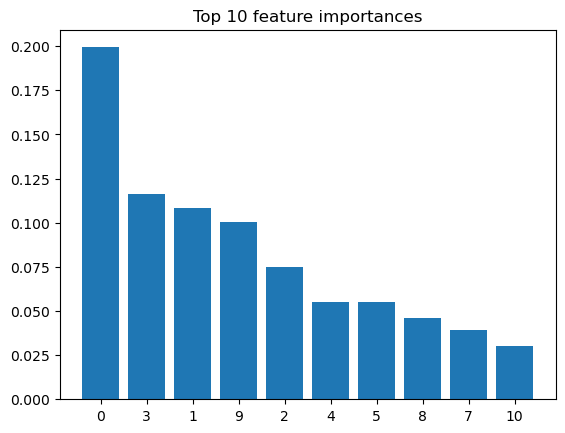

In [122]:
importances = not_tree_best.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()

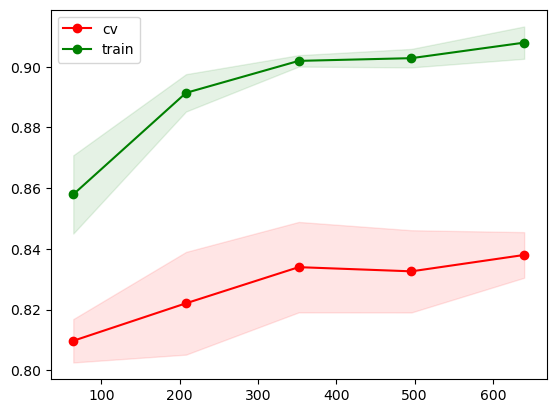

In [129]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(not_tree_best, threshold='mean')
sfm.fit(X_train, y_train)
X_train_dropped = sfm.transform(X_train)
X_test_dropped = sfm.transform(X_test)
title = 'Learning with dropped features'
label_curve = {'train': 'train', 'test':'cv'}
forest_dropped = RandomForestClassifier(max_depth = 11, min_samples_leaf = 5,
n_estimators = 75, n_jobs = -1, random_state = 12)
plot_learning_curve(forest_dropped, title, label_curve, X_train_dropped, y_train, cv = 5)
plt.show()

In [130]:
forest_dropped.fit(X_train_dropped, y_train)
y_dropped_pred = forest_dropped.predict(X_test_dropped)
print('acc', accuracy_score(y_test, y_dropped_pred))
print('f1', f1_score(y_test, y_dropped_pred))
print('roc_auc', roc_auc_score(y_test, y_dropped_pred))

acc 0.815
f1 0.8847352024922118
roc_auc 0.684484389782403
